#  US Border Crossing Data Analysis

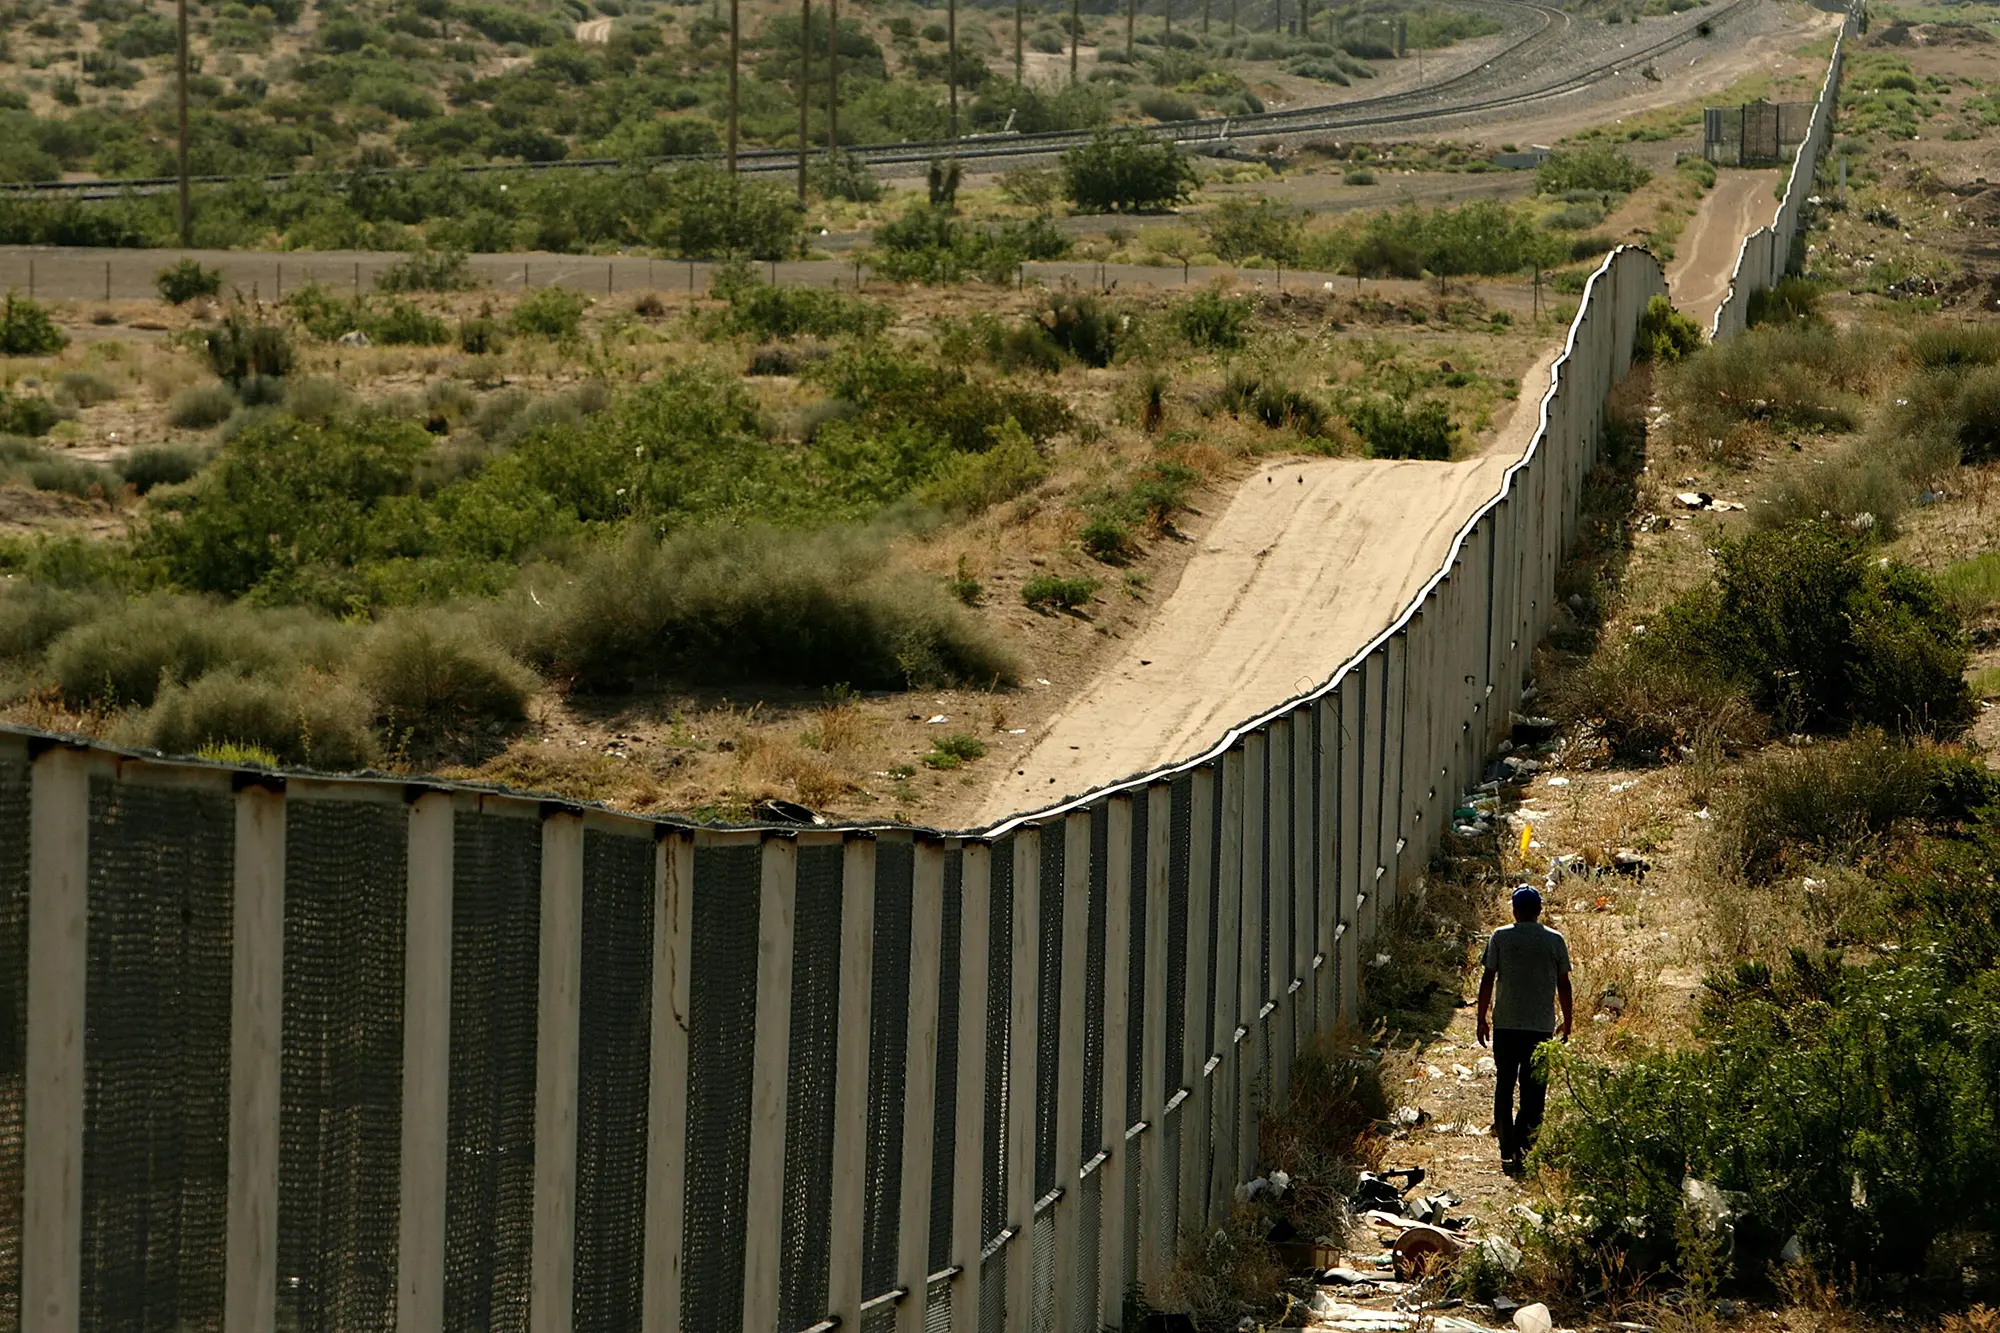

## **Context of this dataset**


*   This dataset is collected from the U.S. Customs and Border Protection (CBP)
*   The data reflect the number of vehicles, containers, passengers or pedestrians entering the United States.
* This dataset contains the following information:
  1.  Date: The month and year of the recorded border crossing data (typically formatted as MM-YYYY).
  2. Port Name: The name of the U.S. port of entry where the crossing data was recorded.
  3. Port Code: A unique identifier assigned to each port of entry by U.S. Customs and Border Protection.
  4. Border: Specifies the country bordering the U.S. at each entry point, either Canada or Mexico.
  5. Measure: Indicates the mode of transportation or type of crossing, such as “Trucks,” “Trains,” “Buses,” “Personal Vehicles,” “Pedestrians,” or “Containers.”









## Data Analysis Questions:


1.   What is the total volume of inbound crossings over time, and how does it differ between ports?
2.   How does the volume of crossings vary seasonally or by month? Are there any observable trends year-over-year?
3. What percentage of crossings are made by each type of transport (trucks, trains, personal vehicles, etc.), and how has this changed over time?
4. Are there any notable differences in the volume of certain transportation modes between the Canada-U.S. and Mexico-U.S. borders?
5. Which ports of entry have the highest and lowest crossing volumes, and how do these vary by type of transport?
6. Are there any notable patterns in crossings based on geographic location, such as ports in rural versus urban areas?
7. How did specific external factors (e.g., policy changes, economic fluctuations, or events like the pandemic) impact crossing volumes?



In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Loading the dataset

df = pd.read_csv("Border_Crossing_Entry_Data.csv")
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
3,Whitlash,Montana,3321,US-Canada Border,Jan 2024,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725)
4,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)


In [ ]:
# Displaying the technical info about the dataset
print(df.info())

def data_info(data):
  print('\n')
  print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")
  print(f"The dataset has {data.isnull().sum().sum()} missing values")
  print(f"The dataset has {data.duplicated().sum()} duplicated values")
  print(f"The dataset has {data.nunique().sum()} unique values")


data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395638 entries, 0 to 395637
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  395638 non-null  object 
 1   State      395638 non-null  object 
 2   Port Code  395638 non-null  int64  
 3   Border     395638 non-null  object 
 4   Date       395638 non-null  object 
 5   Measure    395638 non-null  object 
 6   Value      395638 non-null  int64  
 7   Latitude   395638 non-null  float64
 8   Longitude  395638 non-null  float64
 9   Point      395638 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.2+ MB
None


The dataset has 395638 rows and 10 columns
The dataset has 0 missing values
The dataset has 10 duplicated values
The dataset has 61725 unique values


In [ ]:
# Exploring duplicated values

df[df.duplicated()]

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
48035,Del Rio,Texas,2302,US-Mexico Border,Jun 2019,Personal Vehicles,123068,29.327,-100.928,POINT (-100.927612 29.326784)
50258,Santa Teresa,New Mexico,2408,US-Mexico Border,Jun 2019,Personal Vehicles,50672,31.784,-106.679,POINT (-106.679437 31.783939)
51940,Del Rio,Texas,2302,US-Mexico Border,Jun 2019,Personal Vehicle Passengers,238721,29.327,-100.928,POINT (-100.927612 29.326784)
52134,Fort Kent,Maine,110,US-Canada Border,Jun 2019,Personal Vehicle Passengers,14056,47.249,-68.604,POINT (-68.603918 47.249206)
54059,Roma,Texas,2310,US-Mexico Border,Jun 2019,Personal Vehicles,54953,26.404,-99.019,POINT (-99.018981 26.403928)
54501,Fort Kent,Maine,110,US-Canada Border,Jun 2019,Personal Vehicles,9615,47.249,-68.604,POINT (-68.603918 47.249206)
55187,Roma,Texas,2310,US-Mexico Border,Jun 2019,Personal Vehicle Passengers,104640,26.404,-99.019,POINT (-99.018981 26.403928)
58326,Detroit,Michigan,3801,US-Canada Border,Jun 2019,Personal Vehicle Passengers,599521,42.332,-83.048,POINT (-83.047924 42.331685)
58965,Detroit,Michigan,3801,US-Canada Border,Jun 2019,Personal Vehicles,351889,42.332,-83.048,POINT (-83.047924 42.331685)
59042,Santa Teresa,New Mexico,2408,US-Mexico Border,Jun 2019,Personal Vehicle Passengers,110576,31.784,-106.679,POINT (-106.679437 31.783939)


It seems that these data values are not duplicates of each other although there are overlapping values in each columns, but the [Value] column have different values. Therefore, we will keep these data points.

In [ ]:
# Feature engineering; changing the data type of [Date] column from object to datetime

df['Date'] = pd.to_datetime(df['Date'], format="%b %Y")

# Extracting month and year from datetime column

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

# Displaying the data

df.head()


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Month,Year,Day
0,Roma,Texas,2310,US-Mexico Border,2023-12-01,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928),12,2023,1
1,Del Rio,Texas,2302,US-Mexico Border,2023-12-01,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784),12,2023,1
2,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972),1,2024,1
3,Whitlash,Montana,3321,US-Canada Border,2024-01-01,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725),1,2024,1
4,Ysleta,Texas,2401,US-Mexico Border,2024-01-01,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859),1,2024,1


In [ ]:
# Removing [Point] column as we already have latitude and longitude columns
df.drop('Point', axis=1, inplace=True)

### 1. What is the total volume of inbound crossings over time, and how does it differ between ports?

In [ ]:
pivot_df_inbound_volume = df.groupby(['Date'])['Value'].sum().reset_index()

fig = px.line(pivot_df_inbound_volume,
             x='Date',
             y='Value',
             title='Total Volume of Inbound Crossings Over Time',
             labels={'Value': 'Total Volume', 'Year': 'Year'},
             template= 'plotly_white'
             )
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=pivot_df_inbound_volume['Date'].dt.year.unique(),
        ticktext=pivot_df_inbound_volume['Date'].dt.year.unique(),
        tickangle=45,
    ),
    )
fig.show()

In [ ]:
# Group data by port to get the total crossing volume per port
total_volume_by_port = df.groupby('Port Name')['Value'].sum()

# Sort ports by total volume and select the top 5
top_5_ports = total_volume_by_port.nlargest(5).index

# Filter the data to include only the top 5 ports
top_5_ports_data = df[df['Port Name'].isin(top_5_ports)]

# Group by month and port for the top 5 ports
monthly_top_ports_data = top_5_ports_data.groupby([top_5_ports_data['Date'].dt.to_period('M'), 'Port Name'])['Value'].sum().reset_index()
monthly_top_ports_data['Date'] = monthly_top_ports_data['Date'].dt.to_timestamp()

# Create a line chart using Plotly Express
fig = px.line(
    monthly_top_ports_data,
    x='Date',
    y='Value',
    color='Port Name',
    template='plotly_white',
    title='Monthly Border Crossing Volume Trends for Top 5 Ports',
    labels={'Date': 'Month', 'Value': 'Total Crossings', 'Port Name': 'Port'}
)
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=monthly_top_ports_data['Date'].dt.year.unique(),
        ticktext=monthly_top_ports_data['Date'].dt.year.unique(),
        tickangle=45))
fig.show()



### 2. How does the volume of crossings vary seasonally? Are there any observable trends year-over-year?

In [ ]:
# Define a function to map each month to a season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['Season'] = df['Month'].apply(month_to_season)
df.head()


seasonal_volume = df.groupby('Season')['Value'].sum().reset_index()

# Sort seasons in chronological order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_volume['Season'] = pd.Categorical(seasonal_volume['Season'], categories=season_order, ordered=True)
seasonal_volume = seasonal_volume.sort_values('Season')

fig = px.bar(
    seasonal_volume,
    x='Season',
    y='Value',
    title='Seasonal Variation in Border Crossing Volume',
    labels={'Value': 'Total Crossing Volume'},
    color='Season',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    template='plotly_white'
)
fig.show()

In [ ]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['Month_Names'] = df['Month'].map(month_mapping)


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


df_seasonality = df.groupby(['Month_Names'])['Value'].sum().reset_index()
df_seasonality['Month_Names'] = pd.Categorical(df_seasonality['Month_Names'], categories=month_order, ordered=True)
df_seasonality = df_seasonality.sort_values('Month_Names')

fig_seasonality = px.line(
    df_seasonality,
    x='Month_Names',
    y='Value',
    title='Seasonal Variation in Border Crossing Volume',
    labels={'Value': 'Total Crossing Volume'},
    template='plotly_white')

fig_seasonality.show()

In [ ]:
yearly_totals = df.groupby(['Year'])['Value'].sum().reset_index()
yearly_totals['YoY_Change'] = yearly_totals['Value'].pct_change() * 100

yearly_totals

fig_yoy = px.line(yearly_totals, x='Year', y='Value', title='Yearly Total Crossing Volume',
              labels={'Value': 'Total Crossing Volume'},
              template='plotly_white', markers=True)

# Create a secondary y-axis for YoY change
fig_yoy.add_scatter(x=yearly_totals['Year'], y=yearly_totals['YoY_Change'],
                 mode='lines+markers', name='YoY Change (%)', yaxis='y2')

# Update layout for secondary y-axis
fig_yoy.update_layout(
    xaxis=dict( tickmode='array',
        tickvals=yearly_totals['Year'].unique(),
        ticktext=yearly_totals['Year'].unique(),
        tickangle=45),
    yaxis=dict(title='Total Crossing Volume'),
    yaxis2=dict(title='YoY Change (%)', overlaying='y', side='right'),
    legend=dict(x=0.9, y=1.2, orientation='h')
)

# Show the figure
fig_yoy.show()

### 3. What percentage of crossings are made by each type of transport (trucks, trains, personal vehicles, etc.), and how has this changed over time?

In [ ]:
df_transport = df.groupby('Measure')['Value'].sum().reset_index()
df_transport

# Visualizing with pie chart

fig_transport = px.pie(df_transport,
                       names='Measure',
                       values='Value',
                       template='plotly_white',
                       title='Percentage of Crossings by Type of Transport',
                       hole=0.4)
fig_transport.show()

In [ ]:
df_sankey = df.groupby(['Border', 'State', 'Measure'])['Value'].sum().reset_index()

unique_labels = pd.concat([df_sankey['Border'], df_sankey['State'], df_sankey['Measure']]).unique()

# Creating a mapping for unique labels
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# Creating lists to store sources, targets, and values
sources = []
targets = []
values = []

# Define the flow from Port Name to Measure
for i, row in df_sankey.iterrows():
    sources.append(label_to_index[row['Measure']])
    targets.append(label_to_index[row['Border']])
    values.append(row['Value'])

# Define the flow from Measure to Region
for i, row in df_sankey.iterrows():
    sources.append(label_to_index[row['Border']])
    targets.append(label_to_index[row['State']])
    values.append(row['Value'])

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=unique_labels),
    link=dict(
      source=sources,
      target=targets,
      value=values,
      color='#bae1c3'
    ))])

# Show the Sankey diagram
fig_sankey.update_layout(title_text="Sankey Diagram of Port Volumes", font_size=10)
fig_sankey.show()

### 4. Are there any notable differences in the volume of certain transportation modes between the Canada-U.S. and Mexico-U.S. borders?

In [ ]:
df_border = df.groupby(['Border', 'Measure'])['Value'].sum().reset_index()

fig_borders = px.bar(df_border,
                     x='Value',
                     y='Measure',
                     color='Border',
                     barmode='group',
                     template='plotly_white',
                     title='Total Border Crossing Volume by Mode of Transport')
fig_borders.update_layout(yaxis=dict(title='Mode of Transport'),
                          xaxis=dict(title='Total Volume'))
fig_borders.show()

### 5. Are there any notable patterns in crossings based on geographic location, such as ports in rural versus urban areas?

In [ ]:
df_filter_2024 = df[df['Year'] == 2024]
df_state_inbound_volume = df_filter_2024.groupby(['Border','State'])['Value'].sum().sort_values(ascending=False).reset_index()

fig_state_inbound_volume = px.bar(df_state_inbound_volume,
                                  x='State',
                                  y='Value',
                                  template='plotly_white',
                                  title='Total Inbound Volume by State in Year 2024',
                                  labels={'Value': 'Total Volume', 'State': 'State'},
                                  color='Border')
fig_state_inbound_volume.show()

In [ ]:
import holidays

us_holidays = holidays.US()

df['Holidays'] = df['Date'].apply(lambda x: us_holidays.get(x))

df_holidays_only = df[df['Holidays'].notnull()]

df_holidays_only.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Month,Year,Day,Season,Month_Names,geometry,Holidays
2,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,1,2024,1,Winter,January,POINT (-109.731 49),New Year's Day
3,Whitlash,Montana,3321,US-Canada Border,2024-01-01,Personal Vehicles,29,48.997,-111.258,1,2024,1,Winter,January,POINT (-111.258 48.997),New Year's Day
4,Ysleta,Texas,2401,US-Mexico Border,2024-01-01,Personal Vehicle Passengers,521714,31.673,-106.335,1,2024,1,Winter,January,POINT (-106.335 31.673),New Year's Day
5,Warroad,Minnesota,3423,US-Canada Border,2024-01-01,Trucks,837,48.999,-95.377,1,2024,1,Winter,January,POINT (-95.377 48.999),New Year's Day
6,Wildhorse,Montana,3323,US-Canada Border,2024-01-01,Trucks,20,48.999,-110.215,1,2024,1,Winter,January,POINT (-110.215 48.999),New Year's Day


In [ ]:
# Grouping the data by ['Date']
grouped_df = df.groupby('Date')['Value'].sum().reset_index()

# Merging the [Value] from grouped_df into a df with only holday dates (df_holidays_only)
holiday_data = df_holidays_only[['Date', 'Holidays']].merge(grouped_df, on='Date', how='left')


# Plotting the line chart
fig_holiday = px.line(grouped_df, x='Date', y='Value', title="Total Volume Over Time with Holiday Markers")

# Adding the holiday markers
fig_holiday.add_scatter(
    x=holiday_data['Date'],
    y=holiday_data['Value'],
    mode='markers',
    name="Holiday",
    marker=dict(color="red", size=8),
    text=holiday_data['Holidays'],
    textposition="top center"
)

fig_holiday.show()

In [ ]:
# Covid 19 period
covid_start = '2020-02-01'
covid_end = '2021-06-01'

before_covid = pivot_df_inbound_volume[pivot_df_inbound_volume['Date'] <= covid_start]
during_covid = pivot_df_inbound_volume[(pivot_df_inbound_volume['Date'] >= covid_start) & (pivot_df_inbound_volume['Date'] <= covid_end)]
after_covid = pivot_df_inbound_volume[pivot_df_inbound_volume['Date'] >= covid_end]

# Create the figure
fig = go.Figure()

# Ploting the line with different colors
fig.add_trace(go.Scatter(x=before_covid['Date'], y=before_covid['Value'],
                         mode='lines', name='Before COVID-19',
                         line=dict(color='blue')))
fig.add_trace(go.Scatter(x=during_covid['Date'], y=during_covid['Value'],
                         mode='lines', name='COVID-19 Period',
                         line=dict(color='red')))
fig.add_trace(go.Scatter(x=after_covid['Date'], y=after_covid['Value'],
                         mode='lines', name='After COVID-19',
                         line=dict(color='blue')))

# Set the layout and display the figure
fig.update_layout(title="Total Volume Over Time with COVID-19 Period Highlighted",
                  xaxis_title="Date", yaxis_title="Volume")
fig.show()
